# Propuesta: VAE

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.losses import MeanSquaredError

In [32]:
# Load dataset using pandas
data = pd.read_csv('test.csv',index_col=0)
print('Working on {} cells and {} genes'.format(*data.shape))

Working on 500 cells and 3000 genes


In [2]:
import scanpy as sc
import pandas as pd

# Ruta a la carpeta que contiene los archivos 'genes.tsv', 'barcodes.tsv' y 'matrix.mtx'
data_dir = '/Users/juank/Downloads/filtered_gene_bc_matrices/mm10'

# Leer los datos usando scanpy
adata = sc.read_10x_mtx(data_dir, var_names='gene_symbols', cache=True)

# Convertir AnnData a DataFrame de Pandas
# Las filas son células y las columnas son genes
data_df = adata.to_df()

# Mostrar las primeras filas del DataFrame para verificar la carga
print(data_df.head())

                    Xkr4  Gm1992  Gm37381  Rp1  Rp1-1  Sox17  Gm37323  Mrpl15  \
AAACCTGAGACGCTTT-1   0.0     0.0      0.0  0.0    0.0    0.0      0.0     0.0   
AAACCTGAGATCTGCT-1   0.0     0.0      0.0  0.0    0.0    0.0      0.0     1.0   
AAACCTGAGGTCATCT-1   0.0     0.0      0.0  0.0    0.0    0.0      0.0     1.0   
AAACCTGCAAGAGTCG-1   0.0     0.0      0.0  0.0    0.0    0.0      0.0     0.0   
AAACCTGCACACATGT-1   0.0     0.0      0.0  0.0    0.0    0.0      0.0     1.0   

                    Lypla1  Gm37988  ...  AC125149.1  AC125149.2  AC125149.4  \
AAACCTGAGACGCTTT-1     2.0      0.0  ...         0.0         0.0         0.0   
AAACCTGAGATCTGCT-1     0.0      0.0  ...         0.0         0.0         0.0   
AAACCTGAGGTCATCT-1     0.0      0.0  ...         0.0         0.0         0.0   
AAACCTGCAAGAGTCG-1     0.0      0.0  ...         0.0         0.0         0.0   
AAACCTGCACACATGT-1     0.0      0.0  ...         0.0         0.0         0.0   

                    AC234645.1  

In [4]:
data_df

,Xkr4,Gm1992,Gm37381,Rp1,Rp1-1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,AC125149.1,AC125149.2,AC125149.4,AC234645.1,AC168977.2,AC168977.1,PISD,DHRSX,Vmn2r122,CAAA01147332.1
AAACCTGAGACGCTTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
AAACCTGAGATCTGCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGTCATCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACCTGCAAGAGTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
AAACCTGCACACATGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCTTGATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
TTTGTCAGTGATAAAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TTTGTCATCCTTGACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0
TTTGTCATCGGCTACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data

In [17]:
class VAE(Model):
    def __init__(self, original_dim, latent_dim=2, intermediate_dim=50, name='autoencoder', **kwargs):
        super(VAE, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.latent_dim = latent_dim
        self.intermediate_dim = intermediate_dim
        
        # Encoder
        self.dense_proj = layers.Dense(intermediate_dim, activation='relu')
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()
        
        # Decoder
        self.dense_output = layers.Dense(original_dim, activation='sigmoid')
    
    def call(self, inputs):
        z_mean, z_log_var, z = self.encode(inputs)
        reconstructed = self.decode(z)
        kl_loss = -0.5 * tf.reduce_mean(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed
    
    def encode(self, inputs):
        x = self.dense_proj(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z
    
    def decode(self, z):
        return self.dense_output(z)

class Sampling(layers.Layer):
    """Utilizamos (z_mean, z_log_var) para muestrear z."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [27]:
original_dim = 3001
vae = VAE(original_dim, latent_dim=20, intermediate_dim=100)

# Compilación del modelo
vae.compile(optimizer='adam', loss=MeanSquaredError())
data = np.random.random((500, 3001))  # 500 células, 3001 genes

vae.fit(data, data, epochs=30, batch_size=32)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2046  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0840
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0840
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0838
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0837
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0838
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0837
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0836
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0835
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0835
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0835
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0835
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0835
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0834
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0834
Epoch 16/30
16/16

In [28]:
imputedData = vae.predict(data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [29]:
imputedData

array([[0.48300204, 0.474267  , 0.50785476, ..., 0.48912376, 0.49177167,
        0.4829895 ],
       [0.4943813 , 0.4795371 , 0.49315503, ..., 0.49847272, 0.50278443,
        0.5020473 ],
       [0.49197456, 0.48847473, 0.4933493 , ..., 0.5053947 , 0.5051523 ,
        0.4590885 ],
       ...,
       [0.49923572, 0.4676192 , 0.46509796, ..., 0.512989  , 0.51159394,
        0.46788323],
       [0.47997403, 0.48793054, 0.5074026 , ..., 0.49237096, 0.5085112 ,
        0.48912483],
       [0.4821966 , 0.4899087 , 0.511982  , ..., 0.5011402 , 0.49645546,
        0.48902228]], dtype=float32)

In [30]:
data

array([[1.53370092e-01, 3.17686255e-01, 7.61183641e-01, ...,
        4.84260722e-01, 4.25981386e-01, 2.96330891e-01],
       [8.69589755e-01, 8.08860968e-01, 4.77018522e-02, ...,
        8.53768389e-01, 8.60427645e-02, 6.10208692e-04],
       [2.09746484e-01, 6.42667654e-01, 5.68449696e-01, ...,
        9.75818208e-01, 1.68003789e-01, 3.46375306e-01],
       ...,
       [7.84907131e-01, 3.52057767e-01, 7.40664011e-01, ...,
        9.14938066e-01, 9.40989941e-01, 7.73281324e-01],
       [4.99102851e-01, 8.79585567e-03, 5.38511436e-01, ...,
        9.48596121e-01, 4.79782344e-01, 2.15986687e-01],
       [5.71636131e-01, 3.39489022e-01, 8.04404078e-01, ...,
        4.07371991e-01, 2.75690351e-01, 2.56317061e-01]])

AttributeError: 'numpy.ndarray' object has no attribute 'values'

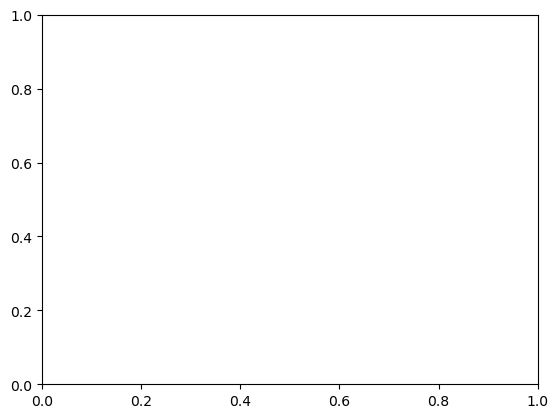

In [20]:
import matplotlib.pyplot as plt
import numpy as np

limits = [0,100]

fig,ax = plt.subplots()

jitter = np.random.normal(0,1,data.size) # Add some jittering to better see the point density
ax.scatter(data.values.flatten()+jitter,imputedData.values.flatten(),s=2)
ax.plot(limits,limits,'r-.',linewidth=2)
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

class Sampling(Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class VAE(Model):
    def __init__(self, original_dim, intermediate_dim=64, latent_dim=20):
        super(VAE, self).__init__()
        self.original_dim = original_dim
        self.latent_dim = latent_dim
        self.intermediate_dim = intermediate_dim
        
        # Encoder
        self.dense_proj = Dense(intermediate_dim, activation='relu')
        self.dense_mean = Dense(latent_dim)
        self.dense_log_var = Dense(latent_dim)
        self.sampling = Sampling()
        
        # Decoder
        self.dense_output = Dense(original_dim, activation='sigmoid')

    def call(self, inputs):
        z_mean, z_log_var, z = self.encode(inputs)
        reconstructed = self.decode(z)
        kl_loss = -0.5 * tf.reduce_sum(
            z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1, axis=1)
        self.add_loss(tf.reduce_mean(kl_loss))
        return reconstructed
    
    def encode(self, inputs):
        x = self.dense_proj(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z
    
    def decode(self, z):
        return self.dense_output(z)

# Setup VAE model
vae = VAE(original_dim=3000, intermediate_dim=64, latent_dim=20)
vae.compile(optimizer=Adam(), loss=MeanSquaredError())

# Assuming 'data' is your properly normalized and preprocessed scRNA-seq data array
# Replace this with actual data loading and preprocessing
# data = np.random.normal(size=(500, 3001))  # Example data

# Train the VAE
vae.fit(data, data, epochs=30, batch_size=32)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan  
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan 
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 14/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 15/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan
Epoch 16/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: na

In [37]:
imputedData = vae.predict(data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [38]:
imputedData

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)